### Imports

In [1]:
# General imports
import numpy as np

# Data Management
import pandas as pd
from sklearn.model_selection import train_test_split

# Machine Learning
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score,RepeatedStratifiedKFold

# Metrics
from sklearn.metrics import precision_score,accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

# Binary Classification Metrics
from sklearn.metrics import plot_roc_curve

# Reporting
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from xgboost import plot_tree

# Other
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

c:\Users\Kreator\anaconda3\envs\MLTRADE\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Data Management

In [2]:
# Read data from file 'data/btc-usd.csv'
df=pd.read_csv('data/btc-usd.csv')
df.set_index('Date',inplace=True)

In [3]:
# Set Target
df['target']=0
df.loc[df['returns'].shift(-1)>df['returns'],'target']=1
df.tail()

Open          High           Low         Close  \
Date                                                                 
2022-05-27  29251.140625  29346.943359  28326.613281  28627.574219   
2022-05-28  28622.625000  28814.900391  28554.566406  28814.900391   
2022-05-29  29019.867188  29498.009766  28841.107422  29445.957031   
2022-05-30  29443.365234  31949.630859  29303.572266  31726.390625   
2022-05-31  31723.865234  32249.863281  31286.154297  31792.310547   

               Adj Close    Volume   returns     range  exp_rets_cum  \
Date                                                                   
2022-05-27  28627.574219 -0.005230 -0.021856  0.036020     27.675606   
2022-05-28  28814.900391 -0.029042  0.006544  0.009117     27.863246   
2022-05-29  29445.957031 -0.490594  0.021900  0.022777     28.495361   
2022-05-30  31726.390625  1.170788  0.077445  0.090298     30.779621   
2022-05-31  31792.310547 -0.146132  0.002078  0.030803     30.845652   

                  rsi  ...      ma_20_T6      ma_50_T6     ma_100_T6  \
Date                   ...                                             
2022-05-27  36.240181  ...  32305.261523  37627.045391  37627.045391   
2022-05-28  37.238957  ...  31894.981250  37316.140859  37316.140859   
2022-05-29  40.613855  ...  31462.404102  36969.047734  36969.047734   
2022-05-30  50.890862  ...  30960.264844  36629.705938  36629.705938   
2022-05-31  51.154006  ...  30609.625879  36309.833320  36309.833320   

            returns_T7  range_T7     rsi_T7      ma_20_T7      ma_50_T7  \
Date                                                                      
2022-05-27   -0.036735  0.064993  35.393691  32757.104883  37964.033750   
2022-05-28    0.007927  0.019343  36.380962  32305.261523  37627.045391   
2022-05-29    0.030290  0.039306  40.172711  31894.981250  37316.140859   
2022-05-30   -0.040391  0.055738  36.917221  31462.404102  36969.047734   
2022-05-31    0.019130  0.034313  39.323912  30960.264844  36629.705938   

               ma_100_T7  target  
Date                              
2022-05-27  37964.033750       1  
2022-05-28  37627.045391       1  
2022-05-29  37316.140859       1  
2022-05-30  36969.047734       0  
2022-05-31  36629.705938       0  

[5 rows x 64 columns]

### Train Test Split

In [4]:
df_tts=df.copy()
# Add the features from the feature selection section
df_tts=df_tts[['Volume','range','rsi','bb_bbh','tenkan_sen','returns_T1','range_T1','rsi_T1','ma_50_T1','returns_T2','range_T2','rsi_T2','returns_T3','range_T3','rsi_T3','returns_T4','range_T4','rsi_T4','returns_T5','range_T5','rsi_T5','returns_T6','range_T6','rsi_T6','returns_T7','range_T7','rsi_T7','ma_20_T7','ma_50_T7','target']]
df_tts.head(3)

Volume     range        rsi       bb_bbh   tenkan_sen  \
Date                                                                  
2017-02-27  0.129492  0.015988  73.302668  1202.959914  1138.660034   
2017-02-28  0.405761  0.018288  73.302668  1217.248044  1150.470032   
2017-03-01  0.238440  0.036289  77.500656  1237.442187  1169.729980   

            returns_T1  range_T1     rsi_T1    ma_50_T1  returns_T2  ...  \
Date                                                                 ...   
2017-02-27    0.018674  0.032976  71.722789  974.211857   -0.025424  ...   
2017-02-28    0.012676  0.015988  73.302668  979.587277    0.018674  ...   
2017-03-01    0.000000  0.018288  73.302668  985.130116    0.012676  ...   

               rsi_T5  returns_T6  range_T6     rsi_T6  returns_T7  range_T7  \
Date                                                                           
2017-02-27  72.284735    0.032704  0.037440  72.029374    0.030643  0.037247   
2017-02-28  77.401493    0.001919  0.022571  72.284735    0.032704  0.037440   
2017-03-01  78.018736    0.044101  0.053413  77.401493    0.001919  0.022571   

               rsi_T7     ma_20_T7    ma_50_T7  target  
Date                                                    
2017-02-27  67.430018  1025.441147  957.457977       0  
2017-02-28  72.029374  1031.754999  959.328978       1  
2017-03-01  72.284735  1037.036996  960.800978       0  

[3 rows x 30 columns]

In [5]:
# Split the data into train and test sets
X = df_tts.iloc[:,:-1] # All columns other than target
y = df_tts.iloc[:,-1] # Only the target column

In [6]:
# Train Test Split time series aware
train_size_rate = 0.7
train_size = int(len(df_tts) * train_size_rate)

X_train, X_test = X.iloc[0:train_size], X.iloc[train_size:len(df_tts)]
y_train, y_test = y.iloc[0:train_size], y.iloc[train_size:len(df_tts)]

print(f"Shape of X_train {X_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of X_train (1344, 29)
Shape of X_test (576, 29)
Shape of y_train (1344,)
Shape of y_test (576,)


### Building the Model

In [7]:
# Select type of model to optimize for
is_binary= True # if the outcome is win lose or draw this should be False
is_optimise_for_precision=True

if is_binary:
  objective='binary:logistic' 
  eval_metric_list=['error','logloss']
else:
  objective='multi:softmax'  
  eval_metric_list=['merror','mlogloss']


if is_binary and is_optimise_for_precision:
  eval_metric='aucpr'
  scoring='precision'
  eval_metric_list.append(eval_metric)
elif is_binary and not is_optimise_for_precision:
  eval_metric='auc'
  scoring='f1'
  eval_metric_list.append(eval_metric)
else:
  scoring='accuracy'

In [8]:
# Build the classifier with hyperparameters from the previous section
eta=0.5
ne=12
lr=0.05
md=7
gm=0.5

classifier=XGBClassifier(
    objective=objective,
    booster='gbtree',
    eval_metric=eval_metric_list,
    subsample=0.8,
    colsample_bytree=1,
    random_state=1,
    use_label_encoder=False,    
    n_estimators=ne,
    learning_rate=lr,
    max_depth=md,
    gamma=gm
)

In [9]:
# Fit model
eval_set=[(X_train,y_train),(X_test,y_test)]
classifier.fit(X_train,y_train,eval_metric=eval_metric_list,eval_set=eval_set,verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric=['error', 'logloss', 'aucpr'], gamma=0.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=12, n_jobs=16, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### Make Predictions

In [10]:
# Get Predictions for Training
train_yhat=classifier.predict(X_train)
train_yhat_prob=classifier.predict_proba(X_train)
print(f'Predictions training data {train_yhat[:3]}')
print(f'Predictions training data probabilities {train_yhat_prob[:3]}')

Predictions training data [0 1 0]
Predictions training data probabilities [[0.53569615 0.46430382]
 [0.46819663 0.53180337]
 [0.588063   0.41193697]]


In [11]:
# Get Predictions for Test
test_yhat=classifier.predict(X_test)
test_yhat_prob=classifier.predict_proba(X_test)
print(f'Predictions testing data {test_yhat[:3]}')
print(f'Predictions testing data probabilities {test_yhat_prob[:3]}')

Predictions testing data [1 0 0]
Predictions testing data probabilities [[0.44768035 0.55231965]
 [0.5533386  0.4466614 ]
 [0.6090219  0.39097813]]


In [12]:
# Set K-Fold Cross Validation Levels
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

In [13]:
# Training Results
training_results = cross_val_score(classifier, X_train, y_train, cv=cv, scoring=scoring,n_jobs=-1)

### Evaluation Metrics

In [14]:
results = classifier.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

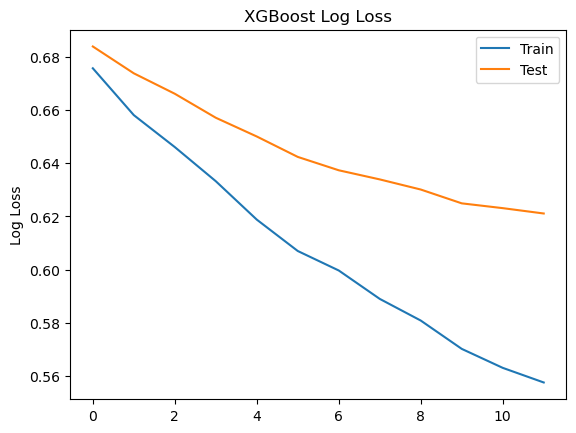

In [15]:
# Plot Log Loss
fig,ax=plt.subplots()

ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

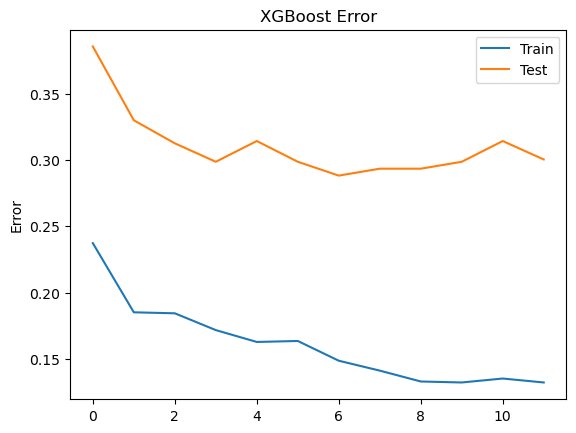

In [16]:
# Plot Classification Error
fig,ax=plt.subplots()

ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Error')
plt.show()

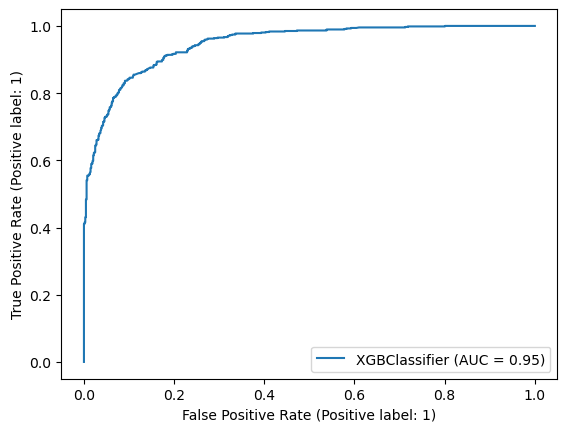

In [17]:
# ROC Curve
plot_roc_curve(classifier, X_train, y_train)
plt.show()

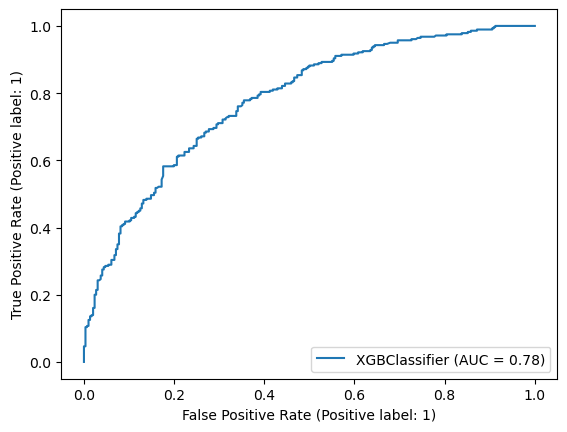

In [18]:
# ROC Curve
plot_roc_curve(classifier, X_test, y_test)
plt.show()

### Summary Report

In [19]:
# For training
print(classification_report(y_train,train_yhat))


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       682
           1       0.87      0.86      0.87       662

    accuracy                           0.87      1344
   macro avg       0.87      0.87      0.87      1344
weighted avg       0.87      0.87      0.87      1344



In [20]:
# For test
print(classification_report(y_test,test_yhat))


              precision    recall  f1-score   support

           0       0.69      0.77      0.72       296
           1       0.72      0.63      0.67       280

    accuracy                           0.70       576
   macro avg       0.70      0.70      0.70       576
weighted avg       0.70      0.70      0.70       576



### Confusion Matrix

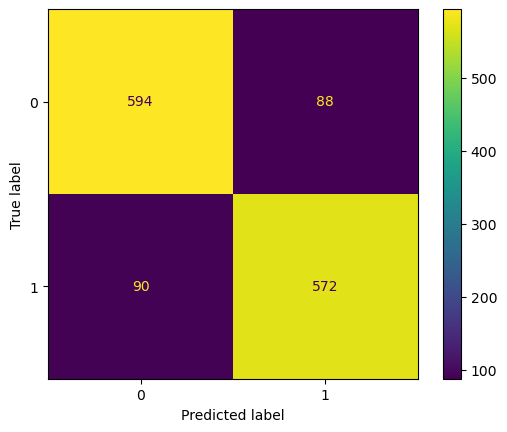

In [21]:
# Training Confusion Matrix
cm_train=confusion_matrix(y_train,train_yhat)
ConfusionMatrixDisplay(cm_train,display_labels=classifier.classes_).plot()

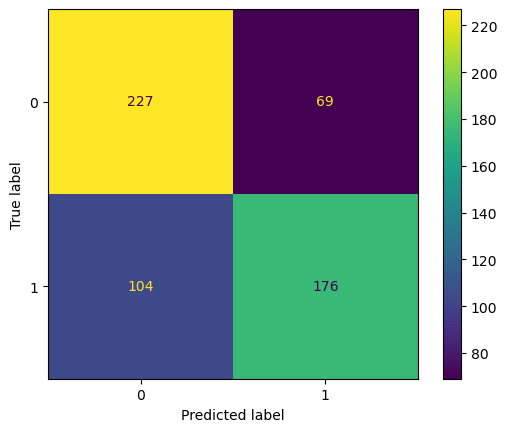

In [22]:
# Test Confusion Matrix
cm_test=confusion_matrix(y_test,test_yhat)
ConfusionMatrixDisplay(cm_test,display_labels=classifier.classes_).plot()

### Feature Importance

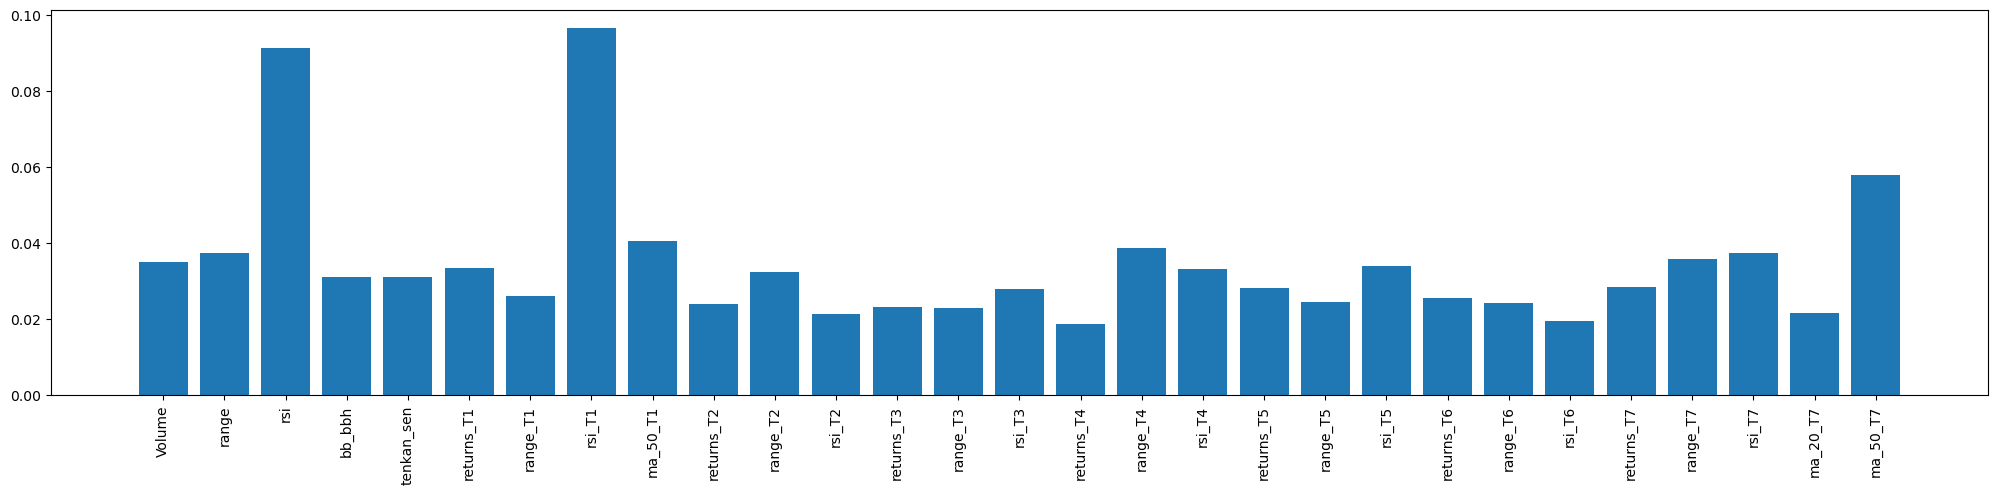

In [23]:
# Plot Feature Importance
fig=plt.figure(figsize=(25,5))

imp_labels = X_train.columns
imp_features = classifier.feature_importances_

plt.bar(imp_labels,imp_features)
plt.xticks(rotation=90) 
plt.show()

### XGBoost Tree Visualization

<AxesSubplot:>

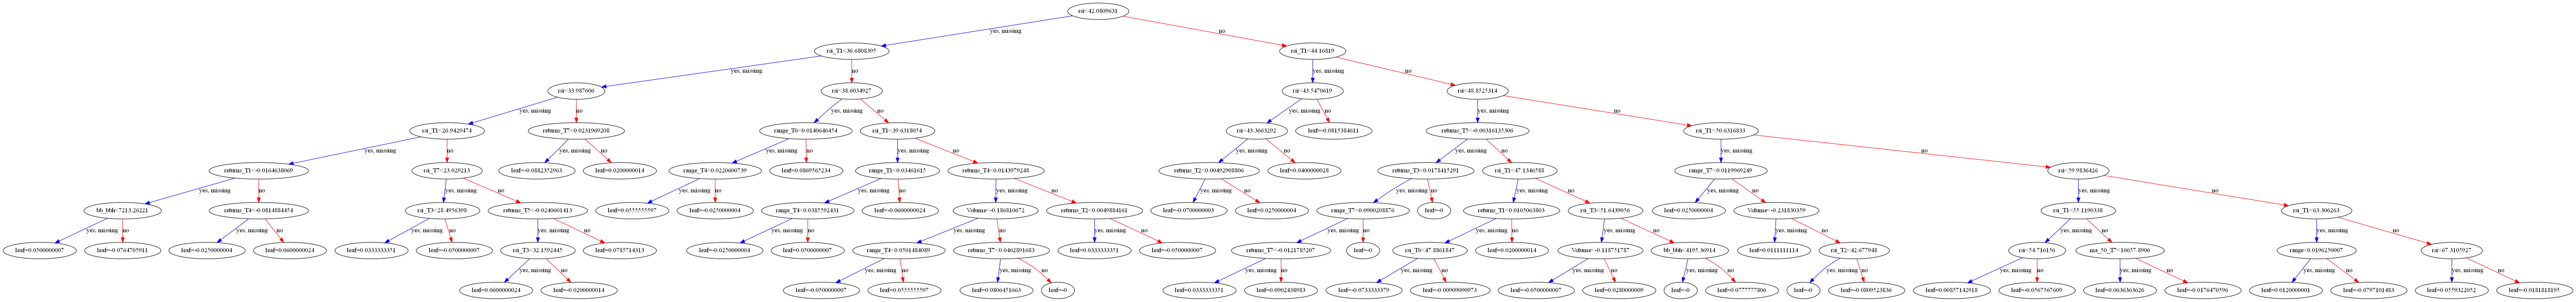

In [28]:
%matplotlib inline
rcParams['figure.figsize'] = 250,250
plot_tree(classifier)